In [7]:
import pandas as pd
import constants as cons
import numpy as np
import utils_data as ud
import utils_info as info
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt

In [3]:
company = 'Company'
hub = 'HUB2'
lag_name = 'LAG'
start_date = pd.datetime(2019, 9, 1)
fcst_date = pd.datetime(2019, 9, 25)
target_name = cons.TIMESERIES_TARGET_NAME

filepath = cons.personal_data_folder

xl = pd.ExcelFile(filepath + 'test_results.xlsx')
data = xl.parse(hub)

models = ['consensus', 'network', 'network+AR', 'regress']
mod_mape = ['Cons_APE','N_APE', 'NAR_APE', 'R_APE']
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data.drop(0, axis = 0, inplace = True)
data.index = pd.to_datetime(data.timestep, format = cons.DATE_HOUR_FORMAT)
data.drop('timestep', axis = 1, inplace = True)
data.LAG = data.LAG.astype('int')
data[mod_mape] = data[mod_mape]*100
#data['Mape_AES'] = data['Mape_AES']*100

In [4]:
data.head(200)

,consumption,forecast,APE,0.0269456451419625,Consensus,Cons_APE,0.0253052012934088,Network,N_APE,0.0304899183906473,Network+AR,NAR_APE,0.0272057601453902,Regress,R_APE,0.0278513488923005,LAG
timestep,,,,,,,,,,,,,,,,,
2019-09-01 00:00:00,395.38,410.94,0.039355,0.021788,410.94,3.935454,0.021788,413.19,4.504527,0.027846,411.95,4.190905,0.022957,409.93,3.680004,0.026600,96
2019-09-01 01:00:00,373.22,388.16,0.040030,NaN,388.16,4.003001,NaN,391.34,4.855045,NaN,386.41,3.534109,NaN,389.91,4.471893,NaN,96
2019-09-01 02:00:00,362.81,379.58,0.046223,NaN,379.58,4.622254,NaN,382.72,5.487721,NaN,379.65,4.641548,NaN,379.50,4.600204,NaN,96
2019-09-01 03:00:00,356.60,372.44,0.044420,NaN,372.44,4.441952,NaN,374.56,5.036455,NaN,369.44,3.600673,NaN,375.43,5.280426,NaN,96
2019-09-01 04:00:00,357.35,371.41,0.039345,NaN,371.41,3.934518,NaN,368.76,3.192948,NaN,370.17,3.587519,NaN,372.65,4.281517,NaN,96
2019-09-01 05:00:00,350.82,359.84,0.025711,NaN,359.84,2.571119,NaN,356.97,1.753036,NaN,356.31,1.564905,NaN,363.36,3.574483,NaN,96
2019-09-01 06:00:00,358.18,373.60,0.043051,NaN,373.60,4.305098,NaN,373.72,4.338601,NaN,370.00,3.300017,NaN,377.20,5.310179,NaN,96
2019-09-01 07:00:00,384.73,397.10,0.032152,NaN,397.10,3.215242,NaN,393.42,2.258727,NaN,389.54,1.250227,NaN,404.67,5.182856,NaN,96
2019-09-01 08:00:00,423.84,435.08,0.026519,NaN,435.08,2.651944,NaN,429.80,1.406191,NaN,426.97,0.738486,NaN,443.20,4.567761,NaN,96


In [53]:
data_subset = data[pd.datetime(2019, 9, 1):pd.datetime(2019, 9, 30)]
hours = data_subset.index.hour.unique()
mape_hour = pd.DataFrame([], columns = ['Mape'], index = hours)
for h in hours:
    mask = data_subset.index.hour == h
    mean_by_h = data_subset.loc[mask, 'Mape_AES'].mean()
    mape_hour.loc[h] = mean_by_h
    

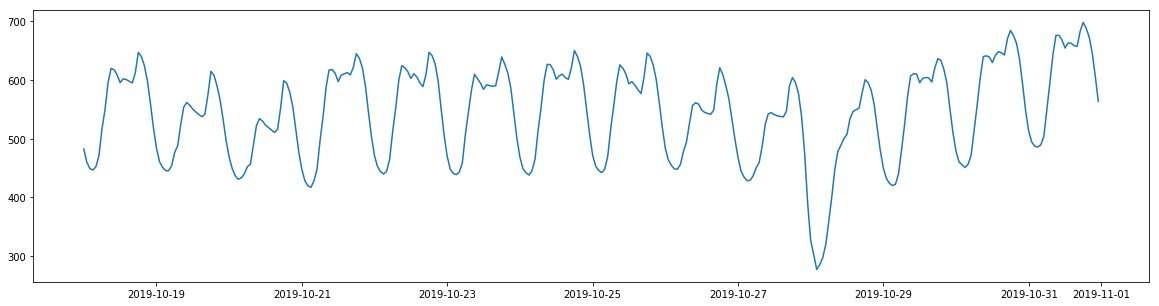

In [22]:
plt.figure(figsize = (20,5))
plt.plot(data.index[-(24*14+120):-120], data.consumption[-(24*14+120):-120])

In [17]:
data.index[-(24*7+120):-120]

DatetimeIndex(['2019-10-25 00:00:00', '2019-10-25 01:00:00',
               '2019-10-25 02:00:00', '2019-10-25 03:00:00',
               '2019-10-25 04:00:00', '2019-10-25 05:00:00',
               '2019-10-25 06:00:00', '2019-10-25 07:00:00',
               '2019-10-25 08:00:00', '2019-10-25 09:00:00',
               ...
               '2019-10-31 14:00:00', '2019-10-31 15:00:00',
               '2019-10-31 16:00:00', '2019-10-31 17:00:00',
               '2019-10-31 18:00:00', '2019-10-31 19:00:00',
               '2019-10-31 20:00:00', '2019-10-31 21:00:00',
               '2019-10-31 22:00:00', '2019-10-31 23:00:00'],
              dtype='datetime64[ns]', name='timestep', length=168, freq=None)

In [14]:
data.consumption[-10:-1]

timestep
2019-11-05 14:00:00   NaN
2019-11-05 15:00:00   NaN
2019-11-05 16:00:00   NaN
2019-11-05 17:00:00   NaN
2019-11-05 18:00:00   NaN
2019-11-05 19:00:00   NaN
2019-11-05 20:00:00   NaN
2019-11-05 21:00:00   NaN
2019-11-05 22:00:00   NaN
Name: consumption, dtype: float64

In [54]:
mape_hour

,Mape
timestep,
0,2.65219
1,2.64757
2,2.54477
3,2.62543
4,2.80199
5,2.60103
6,2.74511
7,2.80893
8,2.63128


In [27]:
data.index.hour.unique()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestep')

In [ ]:
def mape_dow(data, mape_names, dow):
    '''
    MAPE is calculated for each day of week
    '''
    mape_dow = pd.DataFrame([], columns = mape_names, index = dow)
    day_of_week = data.index.dayofweek.unique().sort_values()
    for day in day_of_week:
        for m in mape_names:
            mask = data.index.dayofweek == day
            mape = data.loc[mask, m].mean()
            mape_dow.loc[dow[day], m] = round(mape, 2)
    return mape_dow

In [5]:
def maxape_lag(data, mape_names):
    '''
    Max APE is calculated for each lag
    '''
    lags = np.sort(data.LAG.unique())
    df = pd.DataFrame([], columns = mape_names, index = lags)
    for lag in lags:
        for m in mape_names:
            mask = data.LAG == lag
            maxape = data.loc[mask, m].max() 
            df.loc[lag, m] = round(maxape, 2)
    return df

In [6]:
def make_mape_by_day_extended(data, mape_names):
    lags = np.sort(data.LAG.unique())
    days = data.index.floor(freq = 'D').unique().strftime('%Y-%m-%d')
    df = pd.DataFrame(columns = mape_names)
    df[lag_name] = []
    df_new = pd.DataFrame(columns = mape_names, index = days)
    for lag in lags:
        mask = data[lag_name] == lag
        data_subset = data.loc[mask]
        for m in mape_names:
            for day in days:
                mape = data_subset.loc[day, m].mean()
                df_new.loc[day, m] = round(mape, 2)
                df_new.loc[day, lag_name] = data_subset.loc[day + ' 00:00', lag_name]
        df = pd.concat([df, df_new])
    return df

In [7]:
def make_mape_by_day(data, mape_names):
    
    days = data.index.floor(freq = 'D').unique().strftime('%Y-%m-%d')
    df = pd.DataFrame(columns = mape_names, index = days)
    for m in mape_names:
        for day in days:
            mape = data.loc[day, m].mean()
            df.loc[day, m] = round(mape, 2)
            df.loc[day, lag_name] = data.loc[day + ' 00:00:00', lag_name]
    return df

In [8]:
def mape_by_day_lag(data, mape_names):
    lags = np.sort(data.LAG.unique())
    df = pd.DataFrame(columns = mape_names, index = lags)
    for lag in lags:
        for m in mape_names:
            mask = data[lag_name] == lag
            df.loc[lag, m] = round(data.loc[mask, m].mean(), 2)
    return df

## Evaluations for TEST period from 2019-9-1 to 2019-10-16
### **Mean errors** of forecasts during test period  by *day of week*

In [9]:
mape_dow(data, mod_mape, dow)

,Cons_APE,N_APE,NAR_APE,R_APE
Monday,2.6,2.48,2.44,2.94
Tuesday,2.56,2.17,2.15,3.15
Wednesday,2.11,1.87,1.9,2.7
Thursday,2.53,2.33,2.36,3.18
Friday,2.37,2.34,2.29,2.75
Saturday,1.73,1.77,1.67,2
Sunday,2.27,1.99,1.96,2.88


### **Mean errors by days (just like in excel file)**

In [10]:
mape_by_day = make_mape_by_day(data, mod_mape)
mape_by_day

,Cons_APE,N_APE,NAR_APE,R_APE,LAG
2019-09-01,2.77,2.48,2.69,3.22,96.0
2019-09-02,1.69,1.11,1.15,2.43,120.0
2019-09-03,2.43,1.09,1.08,4.22,120.0
2019-09-04,2.12,1.23,1.06,4.02,72.0
2019-09-05,1.39,0.99,0.81,2.87,72.0
2019-09-06,1.16,1.29,1.22,1.64,72.0
2019-09-07,2.24,1.57,1.45,3.17,72.0
2019-09-08,1.22,2.05,1.89,0.94,96.0
2019-09-09,1.05,1.12,1.11,1.34,120.0
2019-09-10,1.04,1.11,0.99,1.45,120.0


### Mean errors **by models** during test period

In [11]:
mape_by_day.mean()

Cons_APE     2.322667
N_APE        2.141556
NAR_APE      2.115556
R_APE        2.812222
LAG         93.176471
dtype: float64

### **Mean errors** of forecasts during test period (September) by *lags*

In [12]:
mape_by_day_lag(mape_by_day, mod_mape)

,Cons_APE,N_APE,NAR_APE,R_APE
48.0,2.66,1.9,2.44,2.87
72.0,2.19,2.06,2,2.76
96.0,2.34,2.19,2.2,2.7
120.0,2.49,2.24,2.22,2.97
144.0,2.4,2.27,2.15,2.76


In [13]:
(data[lag_name].value_counts()/24).sort_index()

48      1.0
72     24.0
96      9.0
120    14.0
144     3.0
Name: LAG, dtype: float64

### **Max errors** of forecasts during test period (September) by *lags*

In [14]:
maxape_lag(data, mod_mape)

,Cons_APE,N_APE,NAR_APE,R_APE
48,6.78,5.86,7,6.56
72,8.66,8.77,8.7,9.5
96,8.15,9.23,8.8,7.51
120,8.66,7.9,7.87,10.37
144,5.27,5.16,5.08,5.87
